In [277]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import os
import re
import requests
from bs4 import BeautifulSoup
import collections
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
## Where I'm saving the scraped information
oscar_movies = list()

In [89]:
## This scraper takes the data from the input year and add them to the list 'oscar_movies'
def scrape_oscar_movies(year):
    url = 'http://www.boxofficemojo.com/oscar/chart/?view=allmovies&yr='+year+'&sort=numnoms&order=DESC&p=.htm'
    
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")

    body = soup.find('div', {'id':'body'})
    tables = body.find_all('table')
    table_rows = tables[2].find_all('tr')
    
    for row in table_rows[1:]:
        column = row.find_all('td')
        row = column[0].text
        rank = column[1].text
        title = column[2].text
        movie_url = column[2].a.get('href')
        studio = column[3].text
        boxoffice = column[4].text
        nominations = column[5].text
        wins = column[6].text

        oscar_movies.append([year, title, studio, boxoffice, nominations, wins, movie_url])


In [85]:
scrape_oscar_movies('2014')

In [103]:
## Loop the function for the following years that I'm interseted in collecting data for:
years = ['2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006']
for year in years:
    scrape_oscar_movies(year)
    time.sleep(5)

In [104]:
## Change it into a dataframe
oscar_df = pd.DataFrame(oscar_movies, columns = ['Year', 'Movie', 'Studio', 'BoxOffice', 'Nominations', 'Wins', 'URL'])

In [105]:
oscar_df

,Year,Movie,Studio,BoxOffice,Nominations,Wins,URL
0,2014,Birdman,FoxS,"$42,340,598",9,4,/oscar/movies/?id=birdman.htm
1,2014,The Grand Budapest Hotel,FoxS,"$59,301,324",9,4,/oscar/movies/?id=grandbudapesthotel.htm
2,2014,The Imitation Game,Wein.,"$91,125,683",8,1,/oscar/movies/?id=imitationgame.htm
3,2014,American Sniper,WB,"$350,126,372",6,1,/oscar/movies/?id=americansniper.htm
4,2014,Boyhood,IFC,"$25,352,281",6,1,/oscar/movies/?id=boyhood.htm
5,2014,The Theory of Everything,Focus,"$35,893,537",5,1,/oscar/movies/?id=theoryofeverything.htm
6,2014,Whiplash,SPC,"$13,092,000",5,3,/oscar/movies/?id=whiplash.htm
7,2014,Foxcatcher,SPC,"$12,096,300",5,0,/oscar/movies/?id=foxcatcher.htm
8,2014,Interstellar,Par.,"$188,020,017",5,1,/oscar/movies/?id=interstellar.htm
9,2014,Mr. Turner,SPC,"$3,958,500",4,0,/oscar/movies/?id=mrturner.htm


In [106]:
## Change some data types to int
oscar_df['BoxOffice'].replace(regex=True,inplace=True,to_replace=r'[\$,]',value=r'')

## Coerce to proper data type
oscar_df['BoxOffice'] = pd.to_numeric(oscar_df['BoxOffice'], errors = 'coerce')
oscar_df['Nominations'] = pd.to_numeric(oscar_df['Nominations'])
oscar_df['Wins'] = pd.to_numeric(oscar_df['Wins'])

In [108]:
oscar_df.to_csv('OscarNominatedMovies.csv', index = False, encoding = 'utf-16')

In [110]:
## Done with data frame, But I don't really care about small movies right now
larger_movies = oscar_df[oscar_df['BoxOffice'] >= 2000000]

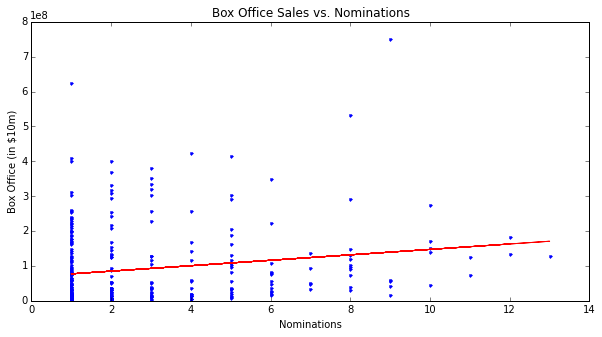

In [276]:
## Plot data and its regression
x = larger_movies['Nominations']
y = larger_movies['BoxOffice']

plt.figure(figsize = (10,5))
plt.plot(x, y, 'b.')

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, 'r-')

plt.title('Box Office Sales vs. Nominations')
plt.xlabel('Nominations')
plt.ylabel('Box Office (in $10m)')


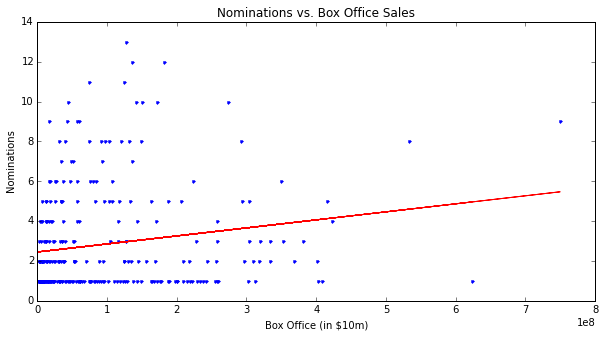

In [284]:
y1 = larger_movies['Nominations']
x1 = larger_movies['BoxOffice']

plt.figure(figsize = (10,5))
plt.plot(x1, y1, 'b.')

slope1, intercept1 = np.polyfit(x1, y1, 1)
plt.plot(x1, slope1*x1 + intercept1, 'r-')

plt.title('Nominations vs. Box Office Sales')
plt.ylabel('Nominations')
plt.xlabel('Box Office (in $10m)')

In [271]:
## OLS model
model = sm.OLS(y, x)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BoxOffice   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     135.4
Date:                Wed, 27 Jan 2016   Prob (F-statistic):           4.37e-26
Time:                        10:14:48   Log-Likelihood:                -6048.8
No. Observations:                 302   AIC:                         1.210e+04
Df Residuals:                     301   BIC:                         1.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Nominations  2.124e+07   1.83e+06     11.634      0.000      1.76e+07  2.48e+07
==============================================================================
Omnibus:                       96.813   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.808
Skew:                           1.532   Prob(JB):                     5.12e-53
Kurtosis:                       6.123   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
pearsonr(x,y)

(0.1771487200903139, 0.0020000383115621242)

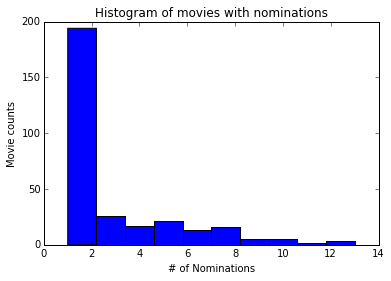

In [252]:
plt.hist(larger_movies['Nominations'])
plt.title('Histogram of movies with nominations')
plt.xlabel('# of Nominations')
plt.ylabel('Movie counts')

### Getting list of movie URLs and scraping those pages for stuff

In [228]:
movie_details = list()

In [218]:
movie_url = list(larger_movies['URL'])

In [130]:
movie_page = '/oscar/movies/?id=birdman.htm'

In [217]:
def scrape_oscar_movie_page(movie_page):
    ## Concat the movie URL input with the web address
    url = 'http://www.boxofficemojo.com'+movie_page

    ## Fetch the webpage
    page1 = requests.get(url).text
    soup1 = BeautifulSoup(page1, "lxml")
    
    ## Find <div id=body> and get title from <h1>
    body1 = soup1.find('div', {'id':'body'})
    title = body1.h1.text
    
    ## Get information from the bold text
    bold1 = body1.find_all('b')
    release_date = bold1[1].text
    budget = bold1[3].text
    runtime = bold1[4].text
    genre = bold1[5].text
    rating = bold1[6].text
    
    ## Get box office data from table
    box = body1.find_all('table')[2]
    table_rows = box.find_all('tr')
    ## And store the pre-nom and post_nom data
    pre_nom = table_rows[1].find_all('td')[2].text
    post_nom = table_rows[2].find_all('td')[2].text
    post_award = table_rows[3].find_all('td')[2].text
    
    ## Add it to list
    movie_details.append([movie_page, title, release_date, budget, genre, rating, pre_nom, post_nom, post_award])

In [229]:
len(movie_url)/float(60)

5.033333333333333

In [239]:
for movie in movie_url[225:]:
    scrape_oscar_movie_page(movie)
    time.sleep(1.5)

In [231]:
movie_details

[['/oscar/movies/?id=birdman.htm',
  u'Birdman',
  u'October 17, 2014',
  u'$18 million',
  u'Comedy / Drama',
  u'R',
  u'$26,601,455',
  u'$11,179,437',
  u'$4,559,706'],
 ['/oscar/movies/?id=grandbudapesthotel.htm',
  u'The Grand Budapest Hotel',
  u'March 7, 2014',
  u'100 mins.',
  u'R',
  u'Picture',
  u'$59,085,803',
  u'$207,666',
  u'$7,855'],
 ['/oscar/movies/?id=imitationgame.htm',
  u'The Imitation Game',
  u'November 28, 2014',
  u'114 mins.',
  u'PG-13',
  u'Picture',
  u'$42,776,746',
  u'$41,106,793',
  u'$7,242,144'],
 ['/oscar/movies/?id=americansniper.htm',
  u'American Sniper',
  u'December 25, 2014',
  u'$58.8 million',
  u'Drama',
  u'R',
  u'$3,372,722',
  u'$316,636,903',
  u'$30,116,747'],
 ['/oscar/movies/?id=boyhood.htm',
  u'Boyhood',
  u'July 11, 2014',
  u'$4 million',
  u'Drama',
  u'R',
  u'$24,352,932',
  u'$942,668',
  u'$36,767'],
 ['/oscar/movies/?id=theoryofeverything.htm',
  u'The Theory of Everything',
  u'November 7, 2014',
  u'$15 million',
  u'

In [240]:
len(movie_details)

302

In [238]:
movie_details

[['/oscar/movies/?id=birdman.htm',
  u'Birdman',
  u'October 17, 2014',
  u'$18 million',
  u'Comedy / Drama',
  u'R',
  u'$26,601,455',
  u'$11,179,437',
  u'$4,559,706'],
 ['/oscar/movies/?id=grandbudapesthotel.htm',
  u'The Grand Budapest Hotel',
  u'March 7, 2014',
  u'100 mins.',
  u'R',
  u'Picture',
  u'$59,085,803',
  u'$207,666',
  u'$7,855'],
 ['/oscar/movies/?id=imitationgame.htm',
  u'The Imitation Game',
  u'November 28, 2014',
  u'114 mins.',
  u'PG-13',
  u'Picture',
  u'$42,776,746',
  u'$41,106,793',
  u'$7,242,144'],
 ['/oscar/movies/?id=americansniper.htm',
  u'American Sniper',
  u'December 25, 2014',
  u'$58.8 million',
  u'Drama',
  u'R',
  u'$3,372,722',
  u'$316,636,903',
  u'$30,116,747'],
 ['/oscar/movies/?id=boyhood.htm',
  u'Boyhood',
  u'July 11, 2014',
  u'$4 million',
  u'Drama',
  u'R',
  u'$24,352,932',
  u'$942,668',
  u'$36,767'],
 ['/oscar/movies/?id=theoryofeverything.htm',
  u'The Theory of Everything',
  u'November 7, 2014',
  u'$15 million',
  u'

In [241]:
import pickle

In [242]:
pickle.dump(movie_details, open( "movie_dets.pkl", "wb" ))

In [246]:
movie_df = pd.DataFrame(movie_details, columns = ['URL', 'Movie', 'Release', 'Production', 'Genre', 'Rating', 'PreNom', 'PostNom', 'PostAward'])

In [247]:
movie_df

,URL,Movie,Release,Production,Genre,Rating,PreNom,PostNom,PostAward
0,/oscar/movies/?id=birdman.htm,Birdman,"October 17, 2014",$18 million,Comedy / Drama,R,"$26,601,455","$11,179,437","$4,559,706"
1,/oscar/movies/?id=grandbudapesthotel.htm,The Grand Budapest Hotel,"March 7, 2014",100 mins.,R,Picture,"$59,085,803","$207,666","$7,855"
2,/oscar/movies/?id=imitationgame.htm,The Imitation Game,"November 28, 2014",114 mins.,PG-13,Picture,"$42,776,746","$41,106,793","$7,242,144"
3,/oscar/movies/?id=americansniper.htm,American Sniper,"December 25, 2014",$58.8 million,Drama,R,"$3,372,722","$316,636,903","$30,116,747"
4,/oscar/movies/?id=boyhood.htm,Boyhood,"July 11, 2014",$4 million,Drama,R,"$24,352,932","$942,668","$36,767"
5,/oscar/movies/?id=theoryofeverything.htm,The Theory of Everything,"November 7, 2014",$15 million,Drama,PG-13,"$26,202,405","$7,930,592","$1,760,540"
6,/oscar/movies/?id=whiplash.htm,Whiplash,"October 10, 2014",$3.3 million,Drama,R,"$6,209,783","$5,120,217","$1,762,000"
7,/oscar/movies/?id=foxcatcher.htm,Foxcatcher,"November 14, 2014",134 mins.,R,Director,"$8,878,856","$3,121,144","$96,300"
8,/oscar/movies/?id=interstellar.htm,Interstellar,"November 5, 2014",$165 million,Sci-Fi Adventure,PG-13,"$185,136,958","$2,420,128","$462,931"
9,/oscar/movies/?id=mrturner.htm,Mr. Turner,"December 19, 2014",150 mins.,R,Cinematography,"$1,366,332","$1,640,668","$951,500"


In [249]:
movie_df.to_csv('movie_details.csv', index = False, encoding = 'utf-16')

In [207]:
movie_details

[['/oscar/movies/?id=birdman.htm',
  u'Birdman',
  <b>October 17, 2014</b>,
  <b>$18 million</b>,
  <b>Comedy / Drama</b>,
  <b>R</b>,
  u'$26,601,455',
  u'$11,179,437',
  u'$4,559,706']]